<a href="https://colab.research.google.com/github/jeancgarciaq/jeancgarciaq.github.io/blob/main/Proyecto4VisualizadorTimesSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fcc-forum-pageviews.csv')
#Index column date
df = df.set_index('date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [ ]:
# Clean data
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


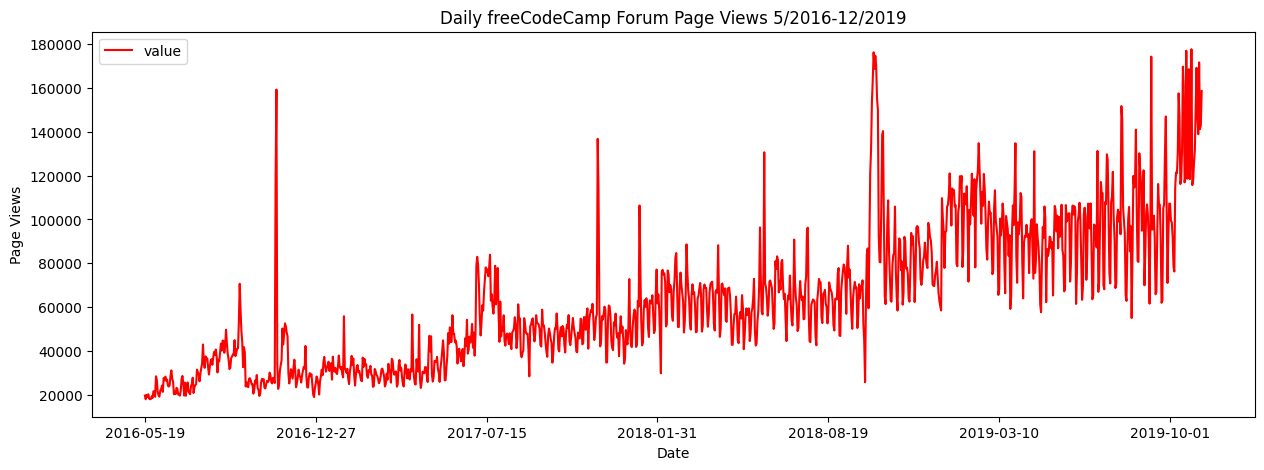

In [ ]:
def draw_line_plot():
    # Draw line plot
    # Create a figure and axes object
    fig, ax = plt.subplots(figsize=(15, 5))
    #Plot on the axes object
    ax = df.plot(kind='line', color='red', ax=ax)
    #title
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    #label x
    plt.xlabel('Date')
    #label y
    plt.ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

draw_line_plot();

In [ ]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()

#reiniciar index
df_bar.reset_index(inplace=True)
#crear columna date
df_bar['date'] = pd.to_datetime(df_bar['date'])
#crear columna mes
df_bar['month'] = df_bar['date'].dt.month
#crear columna año
df_bar['year'] = df_bar['date'].dt.year
#agrupar por año y mes
df_bar = df_bar.groupby(['year', 'month']).mean()

df_bar

date          value
year month                                             
2016 5     2016-05-25 19:12:00.000000000   19432.400000
     6     2016-06-20 02:31:34.736841984   21875.105263
     7     2016-07-14 20:34:17.142857216   24109.678571
     8     2016-08-16 00:00:00.000000000   31049.193548
     9     2016-09-15 12:00:00.000000000   41476.866667
     10    2016-10-16 00:00:00.000000000   27398.322581
     11    2016-11-15 12:00:00.000000000   40448.633333
     12    2016-12-16 00:00:00.000000000   27832.419355
2017 1     2017-01-16 00:00:00.000000000   32785.161290
     2     2017-02-14 12:00:00.000000000   31113.071429
     3     2017-03-16 00:00:00.000000000   29369.096774
     4     2017-04-15 12:00:00.000000000   30878.733333
     5     2017-05-16 00:00:00.000000000   34244.290323
     6     2017-06-15 12:00:00.000000000   43577.500000
     7     2017-07-16 00:00:00.000000000   65806.838710
     8     2017-08-16 00:00:00.000000000   47712.451613
     9     2017-09-15 12:00:00.000000000   47376.800000
     10    2017-10-16 00:00:00.000000000   47438.709677
     11    2017-11-15 12:00:00.000000000   57701.566667
     12    2017-12-16 00:00:00.000000000   48420.580645
2018 1     2018-01-16 00:00:00.000000000   58580.096774
     2     2018-02-14 12:00:00.000000000   65679.000000
     3     2018-03-16 00:00:00.000000000   62693.774194
     4     2018-04-15 12:00:00.000000000   62350.833333
     5     2018-05-16 00:00:00.000000000   56562.870968
     6     2018-06-15 12:00:00.000000000   70117.000000
     7     2018-07-16 00:00:00.000000000   63591.064516
     8     2018-08-16 00:00:00.000000000   62831.612903
     9     2018-09-15 12:00:00.000000000   65941.733333
     10    2018-10-16 13:42:51.428571392  111378.142857
     11    2018-11-15 12:00:00.000000000   78688.333333
     12    2018-12-16 00:00:00.000000000   80047.483871
2019 1     2019-01-16 00:00:00.000000000  102056.516129
     2     2019-02-14 12:00:00.000000000  105968.357143
     3     2019-03-16 00:00:00.000000000   91214.483871
     4     2019-04-15 12:00:00.000000000   89368.433333
     5     2019-05-16 00:00:00.000000000   91439.903226
     6     2019-06-15 08:34:17.142857216   90435.642857
     7     2019-07-16 04:48:00.000000000   97236.566667
     8     2019-08-16 15:43:26.896551680  102717.310345
     9     2019-09-15 12:00:00.000000000   97268.833333
     10    2019-10-12 08:43:38.181818112  122802.272727
     11    2019-11-15 05:08:34.285714176  143166.428571
     12    2019-12-02 00:00:00.000000000  150733.500000

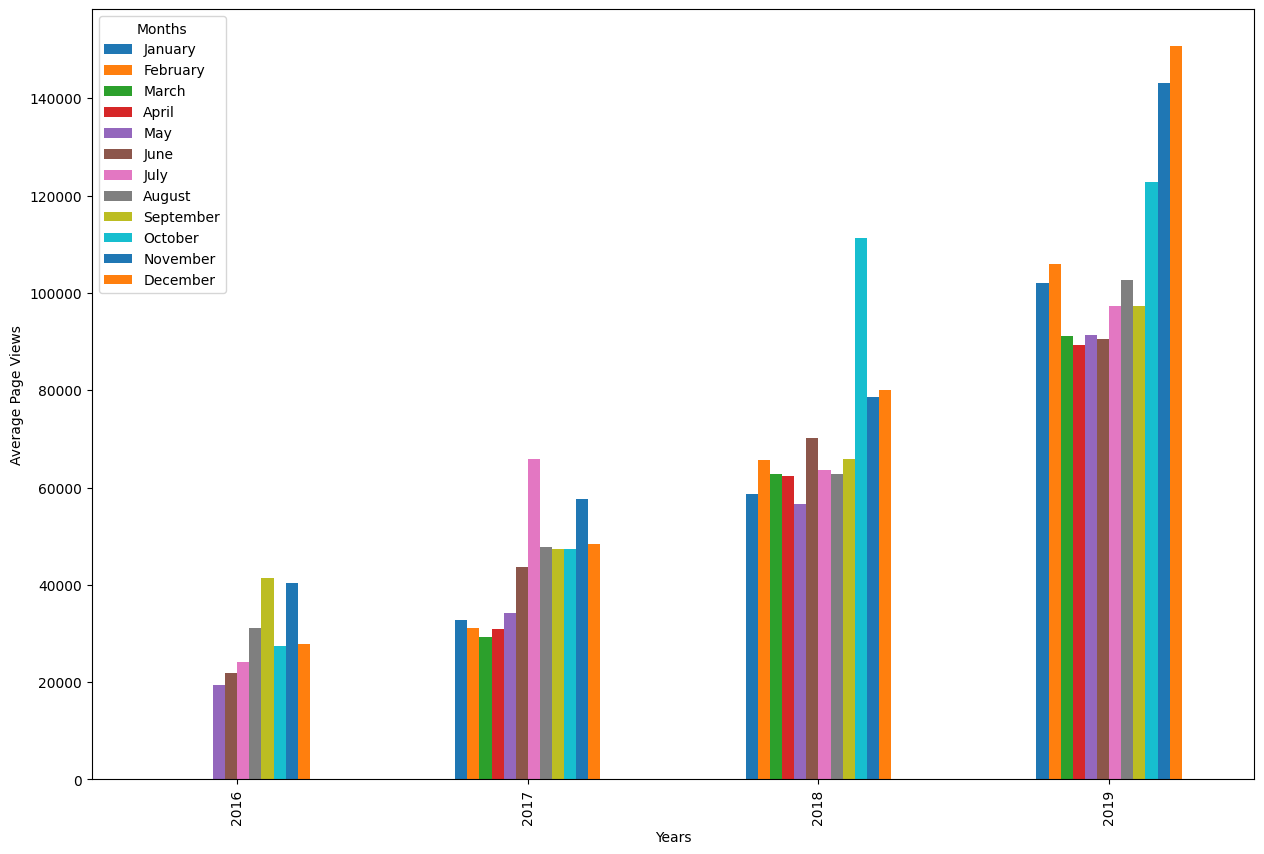

In [ ]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()

    #reiniciar index
    df_bar.reset_index(inplace=True)
    #crear columna date
    df_bar['date'] = pd.to_datetime(df_bar['date'])
    #crear columna mes
    df_bar['month'] = df_bar['date'].dt.month
    #crear columna año
    df_bar['year'] = df_bar['date'].dt.year
    #agrupar por año y mes
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack() # Agrupa por año y mes, calcula la media de 'value' y desapila

    #array con los meses tres letras
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    # Configurar ejes set_axis
    df_bar = df_bar.set_axis(months, axis=1)

    # Draw bar plot
    fig = df_bar.plot(kind ="bar", legend = True, figsize = (15,10)).figure
    plt.xlabel("Years", fontsize= 10)
    plt.ylabel("Average Page Views", fontsize= 10)
    plt.legend(fontsize = 10, title="Months",labels=["January","February", "March", "April", "May","June","July","August", "September","October","November","December"])

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

draw_bar_plot();

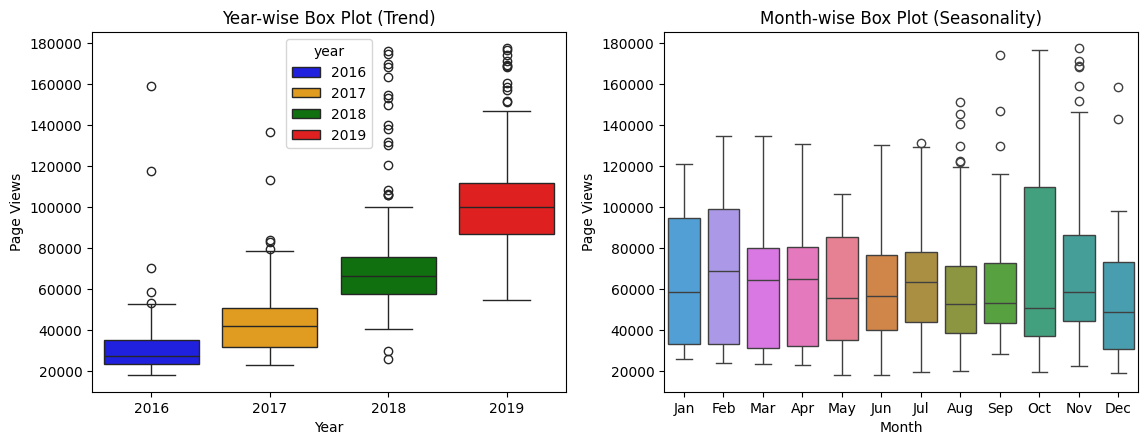

In [ ]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['date'] = pd.to_datetime(df_box['date'])
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box['year'] = [d.year for d in df_box.date]

    # Draw box plots (using Seaborn)
    #palette
    colores = ['b', 'orange', 'g', 'r',]
    #months
    clist_new = ["Jan","Feb", "Mar", "Apr", "May","Jun","Jul","Aug", "Sep","Oct","Nov","Dec"]
    fig,ax = plt.subplots(nrows=1,ncols=2)
    fig.set_size_inches(12, 5)
    fig.tight_layout(pad=4)

    sns.boxplot(x = df_box['year'], y = df_box['value'], ax = ax[0], hue="year", data=df_box,  palette=colores).set(xlabel='Year', ylabel='Page Views')
    sns.boxplot(x = df_box['month'], y = df_box['value'], order = clist_new, ax = ax[1], hue="month", data=df_box).set(xlabel='Month', ylabel='Page Views')

    ax[0].set_title('Year-wise Box Plot (Trend)')
    ax[1].set_title('Month-wise Box Plot (Seasonality)')


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

draw_box_plot();